Ce projet consiste en un jeu de données sur le nombre de vélos loués à Séoul à une certaine heure de la journée, avec des informations complémentaires sur la météo et la période. 
Le but de cette analyse est de prédire le nombre de vélos loués à Séoul en fonction des jours.
Pour cela, nous allons analyser le jeu de donnée puis élaborer et déterminer un modèle de prédiction le plus fiable possible.

In [38]:
#Importation des librairies

#Visualisation des données
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Séparation et mise à échelle des données
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

#Traitement des données
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [39]:
#Importation du jeu de données
df= pd.read_csv("SeoulBikeData.csv",sep=",",header=0)
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [40]:
#Analyse du type des variables
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [41]:
#Modification des chaînes de caractères en variables numériques
df.loc[df['Seasons'] == 'Winter', 'Seasons (int)'] = int(1)
df.loc[df['Seasons'] == 'Spring', 'Seasons (int)'] = int(2)
df.loc[df['Seasons'] == 'Summer', 'Seasons (int)'] = int(3)
df.loc[df['Seasons'] == 'Autumn', 'Seasons (int)'] = int(4)
df['Holiday (int)'] = df['Holiday'].apply(lambda x: 0 if x == 'No Holiday' else 1)
df['Functioning Day (int)'] = df['Functioning Day'].apply(lambda x: 1 if x == 'Yes' else 0)

#Conversion de la date en timestamp et séparation des variables de jour, jour de la semaine, mois et année
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df['day'] = df['Date'].dt.day
df['week_day'] = df['Date'].dt.day_name()
df['month'] = df['Date'].dt.month_name()
df['year'] = df['Date'].dt.year

#Suppression des variables obsolètes ('Seasons' n'est pas supprimé tout de suite pour des raisons d'études de graphe)
df = df.drop(['Holiday', 'Date', 'Functioning Day'], axis=1)

df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Seasons (int),Holiday (int),Functioning Day (int),day,week_day,month,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,1.0,0,1,1,Friday,December,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,1.0,0,1,1,Friday,December,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,1.0,0,1,1,Friday,December,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,1.0,0,1,1,Friday,December,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,1.0,0,1,1,Friday,December,2017
5,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,1.0,0,1,1,Friday,December,2017
6,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,1.0,0,1,1,Friday,December,2017
7,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,1.0,0,1,1,Friday,December,2017
8,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,1.0,0,1,1,Friday,December,2017
9,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,1.0,0,1,1,Friday,December,2017


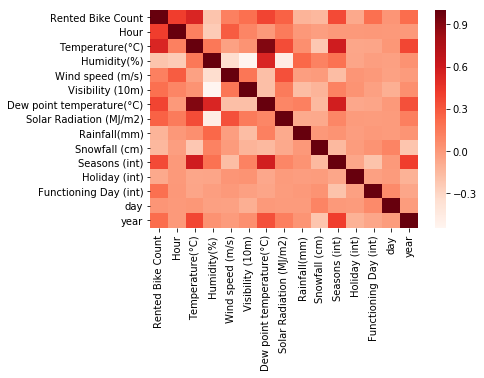

In [42]:
#Analyse des corrélations
sns.heatmap(df.corr(),cmap="Reds")

On constate que le nombre de vélos loués ont une forte corrélation avec la température, la température de rosée, l'heure de la journée et la saison. Analysons principalement ces quatre variables.

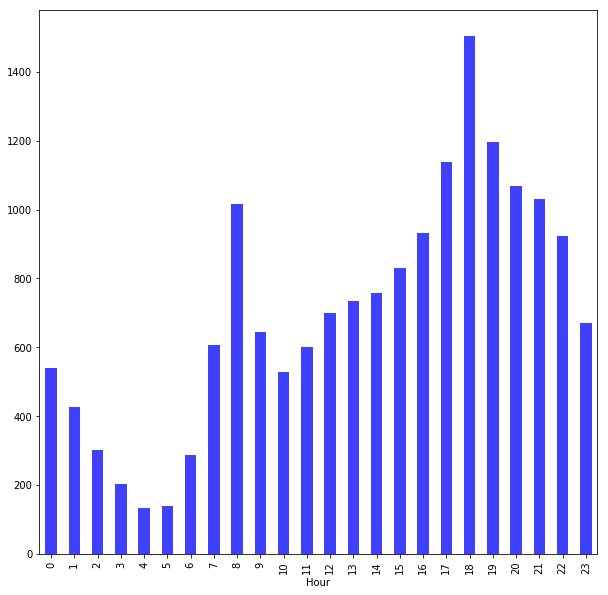

In [43]:
#Analyse du nombre de vélos loués moyen en fonction de l'heure
hours=df.groupby('Hour')['Rented Bike Count'].mean()
hours.plot(x='Hour', y='Rented Bike Count',kind='bar', color='blue',figsize=(10,10),alpha=0.75)

On remarque deux principaux pics de vélos loués vers 8h et 18h, des heures qui s'apparentent aux horaires d'aller/retour au travail pour les Séoulites.

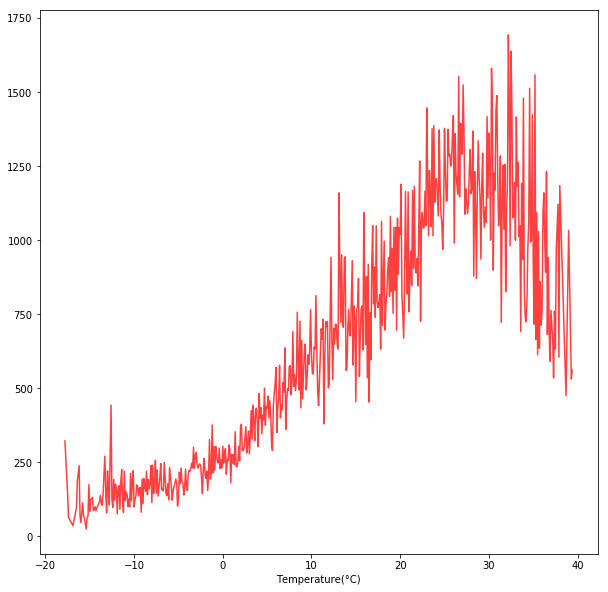

In [44]:
#Analyse du nombre de vélos loués moyen en fonction de la température
temps=df.groupby('Temperature(°C)')['Rented Bike Count'].mean()
temps.plot(x='Temperature(°C)', y='Rented Bike Count',kind='line', color='red',figsize=(10,10),alpha=0.75)

On constate que la température a un énorme impact sur le nombre de vélos loués, avec un pic vers les 32° (C)pour des valeurs faibles en dessous de 0° (C)
On peut donc en déduire que des températures douces ou intermédiaires sont favorables à l'utilisation et l'emprunt de vélos à Séoul.

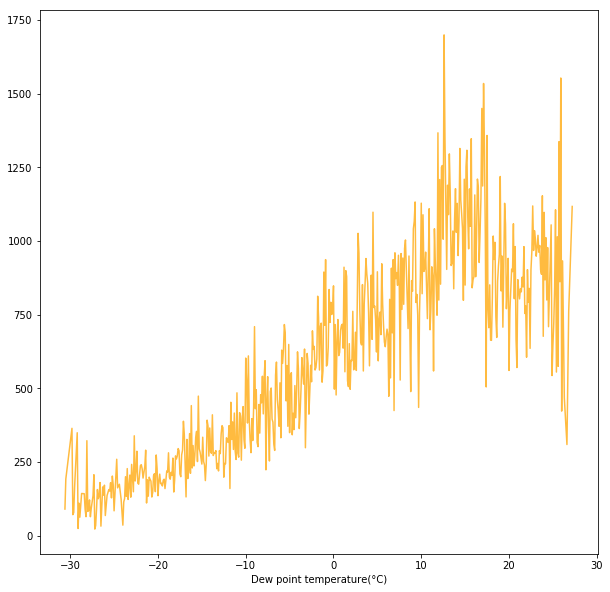

In [45]:
#Analyse du nombre de vélos loués moyen en fonction de la température de rosée
temps=df.groupby('Dew point temperature(°C)')['Rented Bike Count'].mean()
temps.plot(x='Dew point temperature(°C)', y='Rented Bike Count',kind='line', color='orange',figsize=(10,10),alpha=0.75)

Très similaire à la température (et très lié en même temps), on constate un fort pic d'emprunt de vélos pour des valeurs élevées de température de rosée.

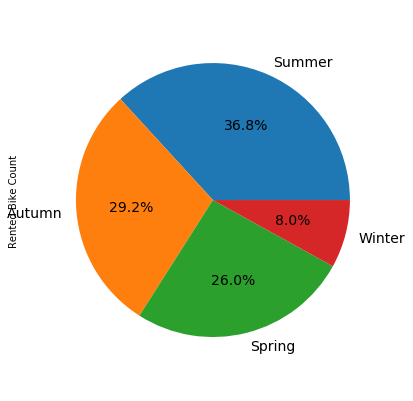

In [46]:
#Analyse du nombre de vélos loués en fonction de la saison
seasons=df.groupby('Seasons')['Rented Bike Count'].mean().sort_values( ascending = False)
seasons.plot(kind='pie', startangle = 0 ,
                 shadow = False,
                 legend = False,
                 autopct = '%1.1f%%', 
                 fontsize = 14,
                 radius = 0.9,
                 table = False,
                 figsize=(7,7))

#Suppresion de la variable 'seasons'
df = df.drop(['Seasons'], axis=1)

On constate une nette diminution de l'emprunt de vélos à Séoul en Hiver, corrélant notamment avec une chute des températures. L'été semble de même la saison la plus propice à l'emprunt de vélos, de par ses températures plus élevés.

In [47]:
#Préparation des données: numérisation des données non numériques
df = df[df['Functioning Day (int)'] == 1] #On ne prend que les jours de fonctionnement

X1 = df.iloc[:, 1:13]
X2 = df.iloc[:, 1:13]
X2 = X2.drop(['Humidity(%)', 'Rainfall(mm)', 'Wind speed (m/s)', 'Visibility (10m)', 'Snowfall (cm)', 'Holiday (int)', 'Solar Radiation (MJ/m2)', 'Functioning Day (int)'], axis=1)
Y = df.iloc[:, 0]

Nous définissons deux sets d'entrée X1 et X2 pour les différents tests

Le premier set X1 garde toutes les informations données par le dataset (sauf les informations liées à la date, jour de la semaine, mois ou année)
Le deuxième set X2 garde seulement les 4 variables jugées les plus pertinentes au problème

In [48]:
X1

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons (int),Holiday (int),Functioning Day (int)
0,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,1.0,0,1
1,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,1.0,0,1
2,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,1.0,0,1
3,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,1.0,0,1
4,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,1.0,0,1
5,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,1.0,0,1
6,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,1.0,0,1
7,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,1.0,0,1
8,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,1.0,0,1
9,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,1.0,0,1


In [49]:
X2

,Hour,Temperature(°C),Dew point temperature(°C),Seasons (int)
0,0,-5.2,-17.6,1.0
1,1,-5.5,-17.6,1.0
2,2,-6.0,-17.7,1.0
3,3,-6.2,-17.6,1.0
4,4,-6.0,-18.6,1.0
5,5,-6.4,-18.7,1.0
6,6,-6.6,-19.5,1.0
7,7,-7.4,-19.3,1.0
8,8,-7.6,-19.8,1.0
9,9,-6.5,-22.4,1.0


In [50]:
# Séparation du jeu de données en entrainement et test: ()
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y, test_size=0.33, random_state=42)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y, test_size=0.33, random_state=42)

In [51]:
# Filtrage des données d'entrainement
scaler = StandardScaler().fit(X1_train)
scaler2 = StandardScaler().fit(X2_train)

# Transformation des données
X1_train = scaler.transform(X1_train)
X1_test  = scaler.transform(X1_test)
X2_train = scaler2.transform(X2_train)
X2_test  = scaler2.transform(X2_test)

On peut désormais appliquer des modèles et algorithmes à notre jeu de données. Puisqu'il s'agit principalement du nombre de vélos loués en fonction des heures, nous pouvons nous orienter vers des algorithmes de régression:

In [52]:
#Régression linéaire
def MLinearR(X_train, Y_train):
    grid = GridSearchCV(LinearRegression(), {}, n_jobs=-1)
    grid.fit(X_train, Y_train)
    return grid.best_estimator_

#Régression logistique
def MLogisticR(X_train,Y_train):
    grid = GridSearchCV(LogisticRegression(), {}, n_jobs=-1)
    grid.fit(X_train, Y_train)
    return grid.best_estimator_

#Random Forest Classifier
def MRandomFC(X_train, Y_train):
    grid = GridSearchCV(RandomForestClassifier(), {}, n_jobs=-1)
    grid.fit(X_train, Y_train)
    return grid.best_estimator_

In [53]:
#Score des différents algorithmes

#Initialisation
indices = [ "Linear Regression", "Logistic Regression", "Random Forest Classifier"]
score_total = []
score_partiel = []
model_total = []
model_partiel = []


#Ajouts:

#Régression linéaire
temporaire = MLinearR(X1_train, Y1_train)
score_total.append(temporaire.score(X1_test, Y1_test))
model_total.append(temporaire)
temporaire = MLinearR(X2_train, Y2_train)
score_partiel.append(temporaire.score(X2_test, Y2_test))
model_partiel.append(temporaire)

#Régression logistique
temporaire = MLogisticR(X1_train, Y1_train)
score_total.append(temporaire.score(X1_test, Y1_test))
model_total.append(temporaire)
temporaire = MLogisticR(X2_train, Y2_train)
score_partiel.append(temporaire.score(X2_test, Y2_test))
model_partiel.append(temporaire)

#Random Forest Classifier
temporaire = MRandomFC(X1_train, Y1_train)
score_total.append(temporaire.score(X1_test, Y1_test))
model_total.append(temporaire)
temporaire = MRandomFC(X2_train, Y2_train)
score_partiel.append(temporaire.score(X2_test, Y2_test))
model_partiel.append(temporaire)


#Affichage
print(score_total)
print(score_partiel)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split

[0.549573231814608, 0.0021474588403722263, 0.0046528274874731565]
[0.5248677195378582, 0.0007158196134574087, 0.002863278453829635]


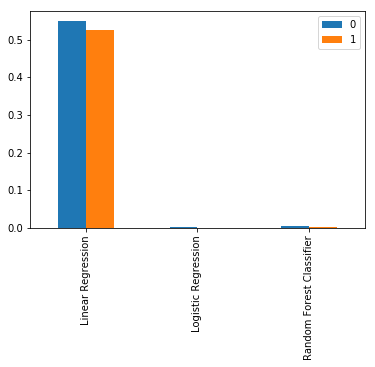

In [54]:
# Graphique
plot = pd.DataFrame(np.c_[score_total, score_partiel], index=indices)
plot.plot.bar()
plt.show()

On constate que le modèle de prédiction de régression linéaire possède un score significativement plus élevé que les autres

Il aurait été intéressant d'utiliser d'autres modèles afin d'avoir plus de choix de comparaison